In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import copy
import seaborn as sns
import os
from scipy import stats
import datetime
from pyclustertend import hopkins

import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

In [22]:
def silhouette(X,max_clusters = 9):
    distortions = []
    
    for i in range(2, max_clusters +1):
        
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0).fit(X)
        
        labels = km.labels_
        
        distortions.append((i,metrics.silhouette_score(X, labels, metric='euclidean')))

    return(distortions)

In [15]:
def plot_distortion(X,label,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o', label = label)
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.legend()

In [16]:
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        
        #print(cluster)
        #print(y_res == cluster)
        
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=100,
                    marker='.',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='black',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

# Credit

In [17]:
credit_scaled = pd.read_csv('credit_scaled.csv')
credit_radar = pd.read_csv('credit_radar.csv')
credit_PCA_kmean = pd.read_csv('credit_PCA_kmean.csv')

In [18]:
credit_scaled.drop('Unnamed: 0', axis = 1, inplace = True)
credit_radar.drop('Unnamed: 0', axis = 1, inplace = True)
credit_PCA_kmean.drop('Unnamed: 0', axis = 1, inplace = True)

### clusters on PCA axis

In [19]:
x_scale = credit_scaled.values

In [20]:
KM = KMeans(n_clusters = 2)
y_res = KM.fit_predict(x_scale)

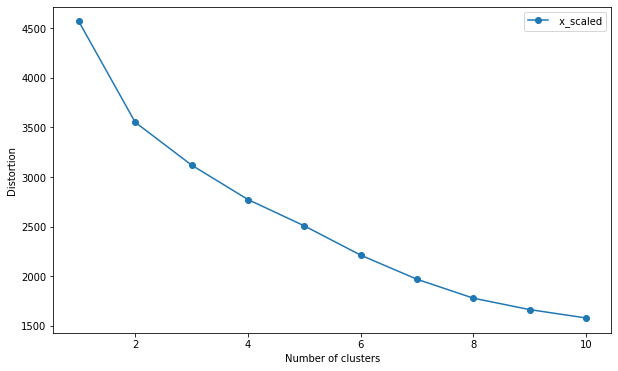

In [21]:
# elbow rule
fig, ax = plt.subplots(figsize=(10,6))
plot_distortion(x_scale,' x_scaled')

In [23]:
silhouette(x_scale)

[(2, 0.45297024019428894),
 (3, 0.4528975677423422),
 (4, 0.1876721707193031),
 (5, 0.24551411998021452),
 (6, 0.1848632807397158),
 (7, 0.1993003681872425),
 (8, 0.21280760236622231),
 (9, 0.2180337018689162)]

0.08073737043000918


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

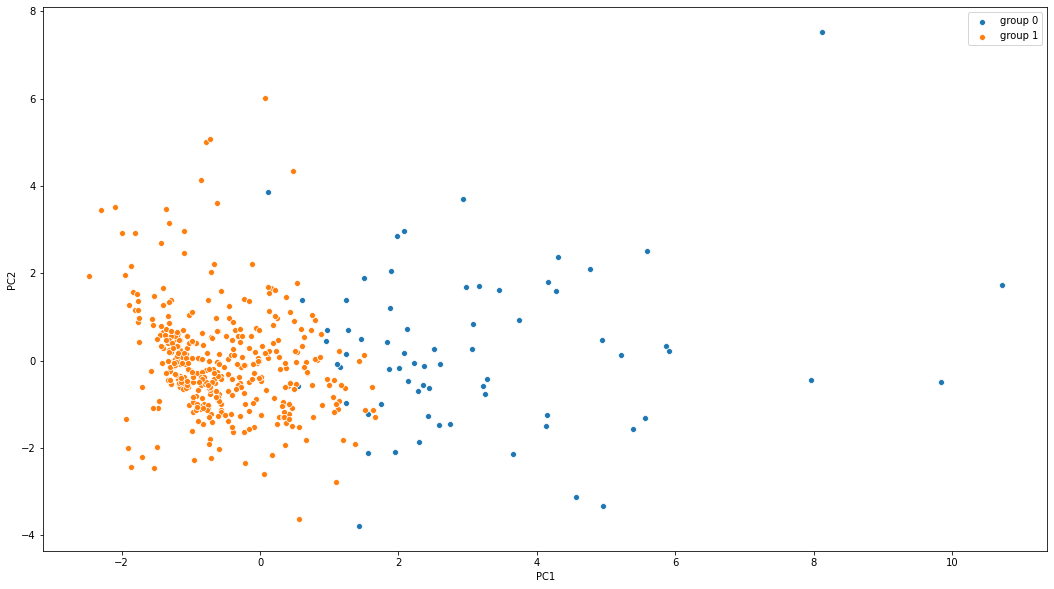

In [24]:
print(hopkins(x_scale,x_scale.shape[0]))

#plot clusters
fig, ax = plt.subplots(figsize=(18,10))
sns.scatterplot(x="PC1", y="PC2", data=credit_PCA_kmean[credit_PCA_kmean['y_res']==0], label = 'group 0')
sns.scatterplot(x="PC1", y="PC2", data=credit_PCA_kmean[credit_PCA_kmean['y_res']==1], label = 'group 1')

### Radar chart

In [25]:
categories = ['income', 'credit_limit', 'starting_balance', 'ending_balance','abs_tran_amt', 'credit_rating', 'small_tran', 'large_tran']

In [26]:
group_0 = []
group_1 = []

for i in categories:
    group_0.append(np.mean(credit_radar[i][credit_radar['cluster'] == 0]))
    group_1.append(np.mean(credit_radar[i][credit_radar['cluster'] == 1]))

In [27]:
group_0_df = pd.DataFrame(dict(means= group_0, category = categories))
group_1_df = pd.DataFrame(dict(means= group_1, category = categories))

In [29]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=group_0_df['means'],theta=group_0_df['category'],fill='toself',name='group 0'))

fig.add_trace(go.Scatterpolar(r=group_1_df['means'],theta=group_1_df['category'],fill='toself',name='group 1'))

fig.update_layout(
    autosize = False,
    width=700,
    height=700,
    polar=dict(
        radialaxis=dict(
          visible=True,
    )),
  showlegend=True
)

fig.show()